In [ ]:

! pip install -q kaggle

from google.colab import files
files.upload()

# Choose the kaggle.json file that you downloaded
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

#Make directory named kaggle and copy kaggle.json file there.
! chmod 600 ~/.kaggle/kaggle.json
#import your dataset API
! kaggle datasets download -d shaleenmishra/agriculture-dataset -p /content/sample_data/ --unzip

Saving kaggle.json to kaggle.json
100% 2.82G/2.83G [00:28<00:00, 87.3MB/s]
100% 2.83G/2.83G [00:28<00:00, 106MB/s] 


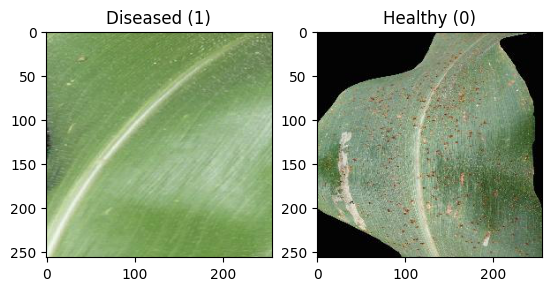

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Define the path to the dataset
dataset_path = "/content/sample_data"
image1 = plt.imread('/content/sample_data/test/Corn___Healthy/image (1023).jpg')
image2 = plt.imread('/content/sample_data/train/Corn___Common_Rust/image (10).JPG')

# Display images side by side
fig, ax = plt.subplots(1, 2) # create a figure with one row and two columns of subplots
ax[0].imshow(image1, cmap='binary') # show the first image on the first subplot
ax[0].set_title('Diseased (1)') # set the title of the first subplot
ax[1].imshow(image2, cmap='binary') # show the second image on the second subplot
ax[1].set_title('Healthy (0)') # set the title of the second subplot
plt.show() # display the figure

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
dataset_path = "/content/sample_data"


In [ ]:
image_paths = []
labels = []

In [ ]:
for folder_name in os.listdir('/content/sample_data'):
    folder_path = os.path.join('/content/sample_data', 'train')
    for image_name in os.listdir('/content/sample_data/train'):
        image_path = os.path.join('/content/sample_data/train','/content/sample_data/train/Wheat___Yellow_Rust')
        image_paths.append('/content/sample_data/train/Wheat___Yellow_Rust')
        labels.append('/content/sample_data/train')

In [ ]:
df = pd.DataFrame(columns=["Image Path", "Label"])

In [ ]:
df["Image Path"] = image_paths
df["Label"] = labels


In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/sample_data/train'
valid_path = '/content/sample_data/test'

In [ ]:
folders = glob('/content/sample_data/train')

In [ ]:
folders

['/content/sample_data/train']

In [ ]:
img = Image. open("/content/sample_data/test/Potato___Healthy/04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL 1930.JPG")
#img

In [ ]:
img = Image. open("/content/sample_data/train/Potato___Healthy/03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG")
#img

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set = train_datagen.flow_from_directory('/content/sample_data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'binary') #categorical

Found 13024 images belonging to 14 classes.


In [ ]:
train_set

In [ ]:
test_set = test_datagen.flow_from_directory('/content/sample_data/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'binary')

Found 2752 images belonging to 14 classes.


In [ ]:
test_set

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the data generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,   # Normalize pixel values to the range [0, 1]
    shear_range = 0.2,  # Apply random shear augmentation
    zoom_range = 0.2,   # Apply random zoom augmentation
    horizontal_flip = True  # Apply random horizontal flips
)

# Load the training set
train_set = train_datagen.flow_from_directory(
    '/content/sample_data/train',
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical'  # Use 'categorical' for multi-class classification
)

# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 14, activation = 'softmax'))  # 14 output classes

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Train the model
model.fit(train_set, epochs = 10)

Found 13024 images belonging to 14 classes.
Epoch 1/10
204/204 [==============================] - 385s 2s/step - loss: 0.9912 - accuracy: 0.6910
Epoch 2/10
204/204 [==============================] - 354s 2s/step - loss: 0.4344 - accuracy: 0.8274
Epoch 3/10
204/204 [==============================] - 358s 2s/step - loss: 0.3628 - accuracy: 0.8498
Epoch 4/10
204/204 [==============================] - 352s 2s/step - loss: 0.3311 - accuracy: 0.8643
Epoch 5/10
204/204 [==============================] - 341s 2s/step - loss: 0.3318 - accuracy: 0.8604
Epoch 6/10
204/204 [==============================] - 341s 2s/step - loss: 0.3059 - accuracy: 0.8708
Epoch 7/10
204/204 [==============================] - 351s 2s/step - loss: 0.2832 - accuracy: 0.8823
Epoch 8/10
204/204 [==============================] - 345s 2s/step - loss: 0.2744 - accuracy: 0.8875
Epoch 9/10
204/204 [==============================] - 346s 2s/step - loss: 0.2741 - accuracy: 0.8854
Epoch 10/10
204/204 [==========================